In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.naive_bayes import GaussianNB
%matplotlib inline
plt.style.use('ggplot')

df_master = pd.read_csv('skewed_data.csv')
df_master.head()

X = np.array(df_master[['0','1']])
Y = df_master[['target']]

Text(0,0.5,'X2')

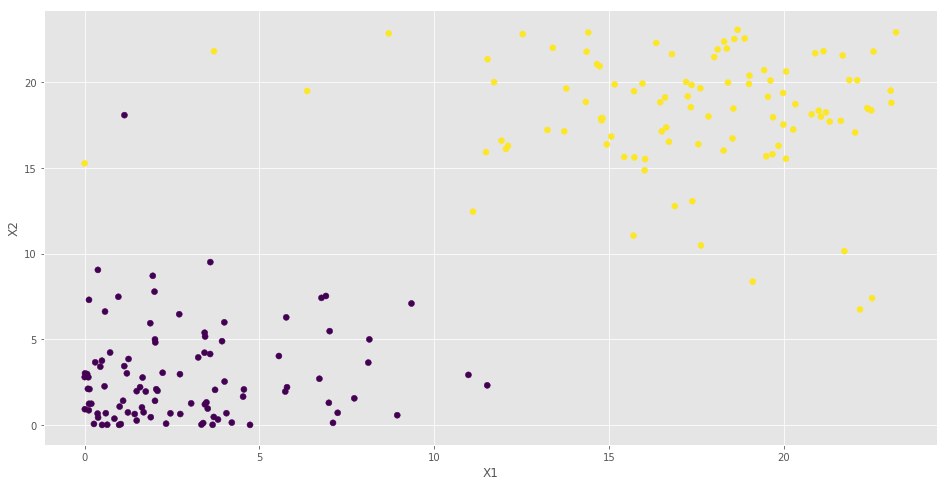

In [44]:
fig = plt.figure(figsize=(16,8))
ax = plt.subplot(111)
plt.scatter(x=df_master['0'],y=df_master['1'],c=df_master['target'])
plt.xlabel('X1')
plt.ylabel('X2')

In [46]:
clf = GaussianNB()
clf.fit(X,Y)

clf.get_params()

{'priors': None}

In [48]:
clf.predict([[5,10]])

array([0])

In [49]:
clf.predict([[15,15]])

array([1])